# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [ ]:
# Numpy and Panadas are used to help with data maniuplation
import pandas as pd
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data for training and testing
from sklearn.model_selection import train_test_split

# Libraries used to build prediction models
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# Library used to get rid of warnings that may pop up.
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Library used to make the code look nicer overall by limiting number of rows and number of decimal places of float variables.
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
pd.set_option("display.float_format", lambda x: "%.5f" % x)

In [ ]:
# Connecting my google drive
from google.colab import drive
drive.mount('/content/drive')

# reading the data
data = pd.read_csv('/content/drive/MyDrive/Colab/INNHotelsGroup.csv')
# returns a random 10 rows
data.sample(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
27054,INN27055,2,0,1,3,Meal Plan 1,0,Room_Type 4,104,2018,7,21,Online,0,0,0,123.30000,0,Not_Canceled
12310,INN12311,2,0,2,2,Meal Plan 1,0,Room_Type 1,1,2018,11,20,Online,0,0,0,91.38000,2,Not_Canceled
28305,INN28306,3,0,1,1,Meal Plan 2,0,Room_Type 4,33,2018,4,30,Online,0,0,0,210.60000,0,Canceled
24031,INN24032,2,0,1,1,Not Selected,0,Room_Type 1,1,2018,5,9,Online,0,0,0,89.00000,0,Not_Canceled
9827,INN09828,2,0,0,3,Meal Plan 1,0,Room_Type 1,42,2018,11,23,Online,0,0,0,78.30000,2,Not_Canceled
8203,INN08204,2,0,0,1,Meal Plan 1,0,Room_Type 1,30,2018,5,21,Online,0,0,0,135.90000,1,Not_Canceled
15355,INN15356,3,0,0,1,Meal Plan 1,0,Room_Type 4,69,2018,7,2,Online,0,0,0,150.30000,0,Canceled
19242,INN19243,1,0,1,2,Meal Plan 1,0,Room_Type 1,31,2018,9,16,Offline,0,0,0,70.00000,0,Not_Canceled
36118,INN36119,2,0,0,4,Meal Plan 1,0,Room_Type 1,47,2017,10,20,Online,0,0,0,94.50000,2,Not_Canceled
15637,INN15638,1,0,2,1,Meal Plan 2,0,Room_Type 1,2,2017,8,15,Offline,0,0,0,72.50000,0,Not_Canceled


Observations: Just by looking at the sample data there are not many eye popping correlations that you can see. However, some that are noticeable in this sample data and that seems intuitively correct is that canceled rooms appear to have a greater lead_time (not always the case). It makes sense some guests may book rooms months in advance and then have something come up.

## Data Overview

- Observations
- Sanity checks

In [ ]:
data.shape
# We use .shape in order to find the dimensions of our data and there are 36275 rows and 19 columns.

(36275, 19)

In [ ]:
data.info()
# Checking in the .info helps us identify the type of data. Furthermore, we can see that there is no null data in our set since there are 36275 in each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
# Use .decribe to view a statistical summary of our data.
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Booking_ID,36275,36275,INN00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_adults,36275.00000,NaN,NaN,NaN,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,NaN,NaN,NaN,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,NaN,NaN,NaN,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,NaN,NaN,NaN,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.00000,NaN,NaN,NaN,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.00000,NaN,NaN,NaN,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,NaN,NaN,NaN,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000


Observations: One thing that sticks out is that the maximum of avg_price_per_room is 540 while the mean is around 103. That is something we should look into. Also, the maximum of no_of_children is 10. When the mean is 0.10528 and median 0 that number is suspicious and we will look into it.

In [ ]:
# Use this to find duplicate entries in the dataset
data.duplicated().sum()
# In this dataset we have no duplicates

0

In [ ]:
# Before we do any EDA, we can drop the Booking_ID column since essentially it functions as an addition index.
data = data.drop('Booking_ID', axis = 1)
# Use .head to check that we dropped the column successfully
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [ ]:
# Lets starts by defining in some functions that will help us make EDA easier and more effective for univariate analysis.

# This function combines a histogram and boxplot and includes features that generally makes the visual nicer and more clear.
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# This function helps us plot labled bar graphs to make the visuals more pleasing to look at.
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# Same with univariate analysis we have a few function in our backpocket that are very useful when it comes to bivariate analysis.

# This stacked bargraph lets up compare two bar graphs between categorical variables
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
# This function plots the distribution wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

## Univariate Analysis

### **Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### Exploring: arrival_month (Question 1)

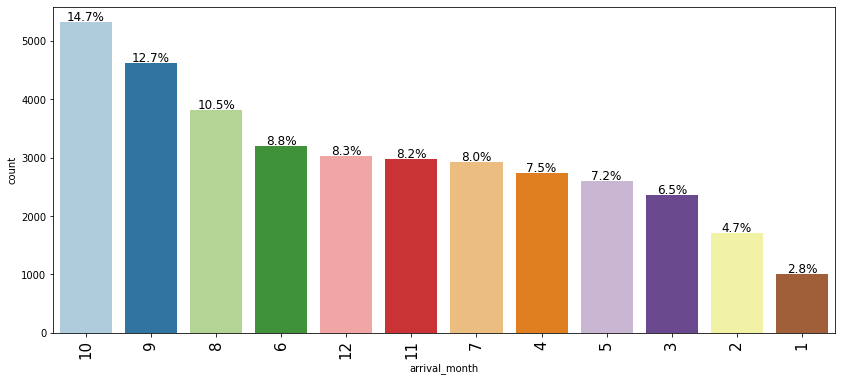

In [ ]:
labeled_barplot(data,'arrival_month', perc = True)

Observations: We can see that October is the busiest month for the hotel followed by September and August. Not really sure why, but it is. We also see that January and Febuary are the least busiest month. This to me makes sense to me since November and December are holiday months and most people are done traveling after the New Year. All of this also depends on factors we do not know such as location and events.

### Exploring: market_segment_type (Question 2)

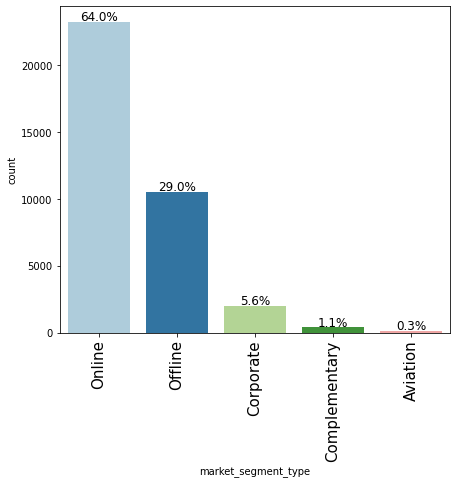

In [ ]:
labeled_barplot(data,'market_segment_type', perc = True)

Observations: A majority of their market type comes from online. And I assume this is how they arranged the hotel room. Where corporate is from a business for something like a business trip, complementary might be a gifted room, and aviation is from the airport maybe for flight staff who may have to stay the night.

### Exploring: booking_status (Question 4)

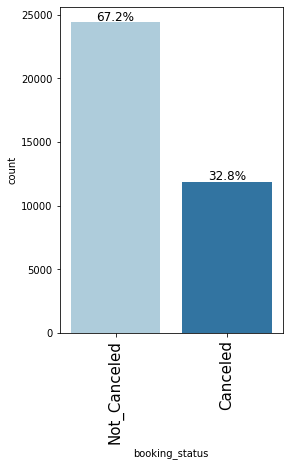

In [ ]:
labeled_barplot(data, 'booking_status', perc = True)

Observations: We can see that 32.8% of bookings are canceled. When we dive into bivariate analysis we will learn more on why they get canceled.

### Other Variables

### Exploring: no_of_adults

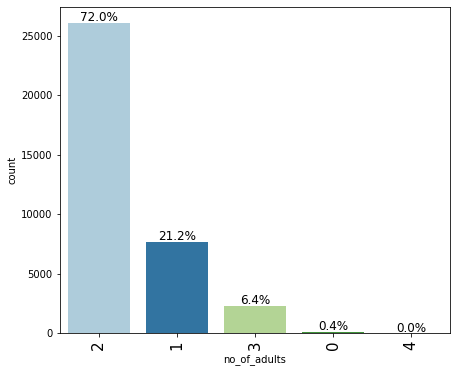

In [ ]:
labeled_barplot(data,'no_of_adults', perc = True)

Observations: We can see that a majority, 72%, of guests come in pairs while 21.2% are solo and the rest are either 0, 3, or 4. It will be interesting whether or not a specific number of adults affect the cancel rate. 0 could be considered strange, but it could be a room full of kids.

### Exploring: no_of_children

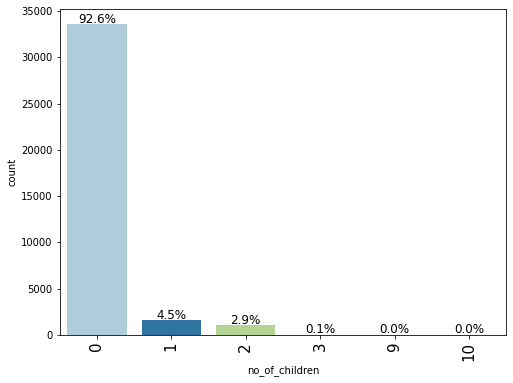

In [ ]:
labeled_barplot(data, 'no_of_children', perc = True)

Observations: We can see that a majority of bookings do not have children. Also, we can see that atleast 1 booking has 9 or 10 children. These are outliers and probably are mistakes, so we need to fix them.

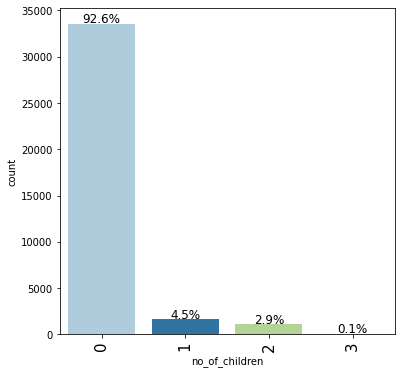

In [ ]:
# We will replace the outliers with 3 since that is the realistic high.
data['no_of_children'] = data['no_of_children'].replace([9,10], 3)
labeled_barplot(data, 'no_of_children', perc = True)

### Exploring: no_of_weekend_nights and no_of_week_nights

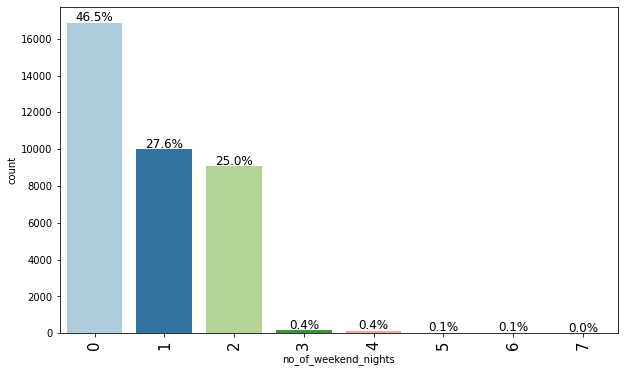

In [ ]:
labeled_barplot(data, 'no_of_weekend_nights', perc = True)

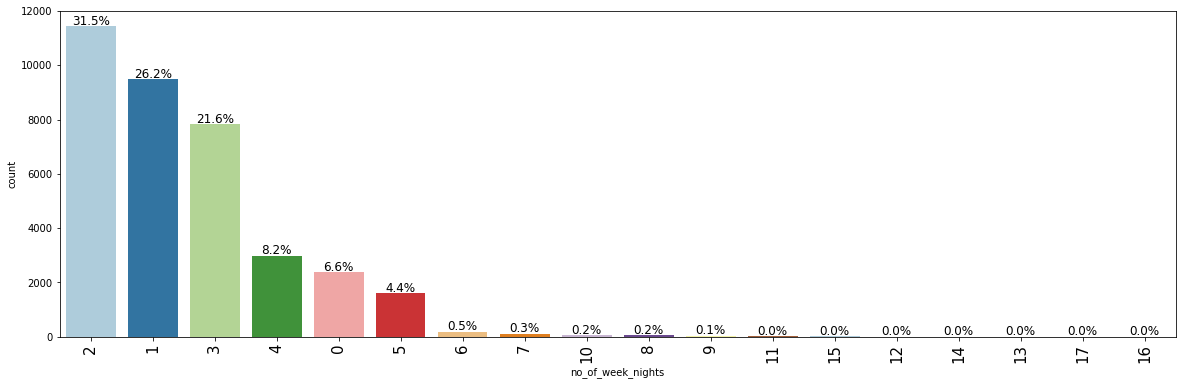

In [ ]:
labeled_barplot(data, 'no_of_week_nights', perc = True)

Observations: Almost 50% of bookings do not stay over a weekend night. And the rest mainly stayed for 1 or 2 weekend nights. This makes sense because not many people are staying at a hotel for more than a week in order to get more than 2 weekend nights. With the weekday nights graph we see that most people stay 2 weekday nights. There are some high number of says stay, but I dont think its unusual just odd cases.

### Exploring: type_of_meal_plan

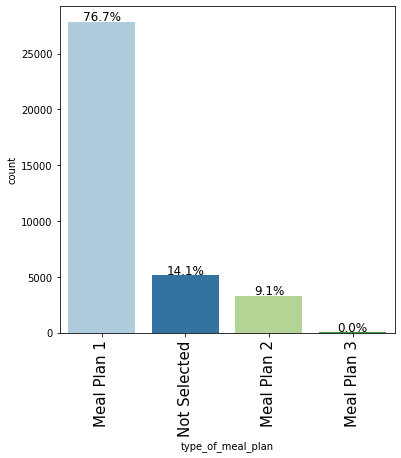

In [ ]:
labeled_barplot(data, 'type_of_meal_plan', perc = True)

Observations: Meal Plan 1 is the clear favorite which is just breakfast and it will be interesting to see if the meal plans might be a reason for people to cancel. Lets say maybe the picked a meal plan and it ends up being more expense than they thought.

### Exploring: required_car_parking_space

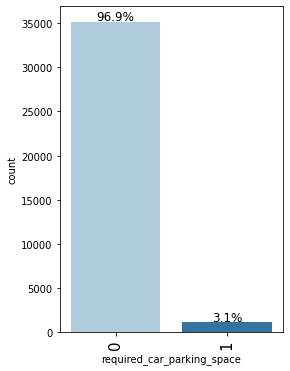

In [ ]:
labeled_barplot(data, 'required_car_parking_space', perc = True)

Observations: Most people do not require a parking space with 96.9% of hotel booking not needing one. Could this be because no one really specifies or they assume they need one? Maybe the hotel is in the city where parking is limited and need people to specify. I do not see this variable affecting much.

### Exploring room_type_reserved

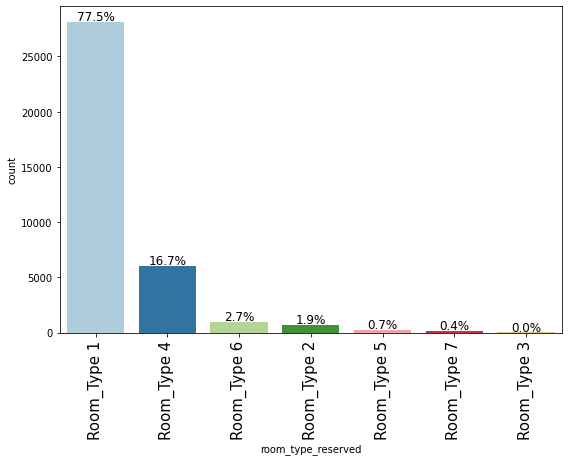

In [ ]:
labeled_barplot(data, 'room_type_reserved', perc = True)

Observations: Since they room types are encoded to us it is hard to really deciver why room_type_1 is the most popular or why room_type_3 is the least popular. If the cancel rate of a certain room is high then it will really pique my interest on how the room differs from the rest.

### Exploring: lead_time

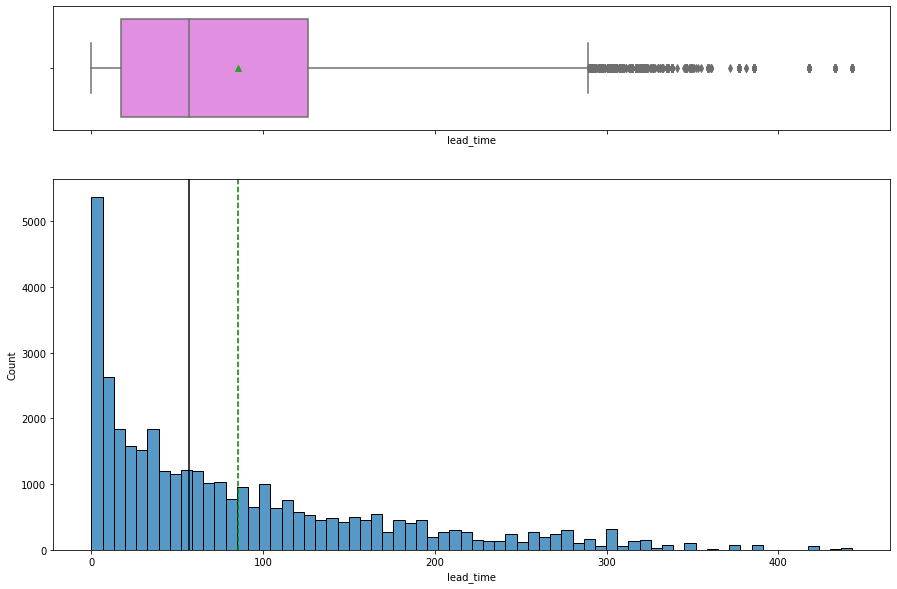

In [ ]:
histogram_boxplot(data, 'lead_time')

Observations: Most of the bookings are done between 0 to 6 days before their stay which makes sense. The mean is around 85.93, so I would have to imagine the hotel is a vacation spot since most people are planning months in advance before staying at the hotel. It will be interesting to see if the longer the lead time if the cancelation rate goes up.

### Exploring: no_of_special_requests

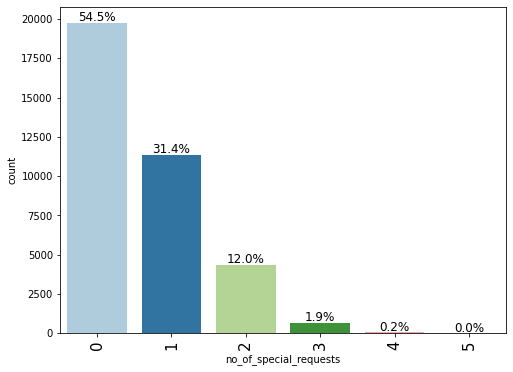

In [ ]:
labeled_barplot(data, 'no_of_special_requests', perc = True)

Observations: 54.5% of bookings do no include special requests. Not sure how this will affect whether or no someone would cancel. I can see if you have a lot of requests then the hotel might refuse some thus making you cancel.

### Exploring: avg_price_per_room

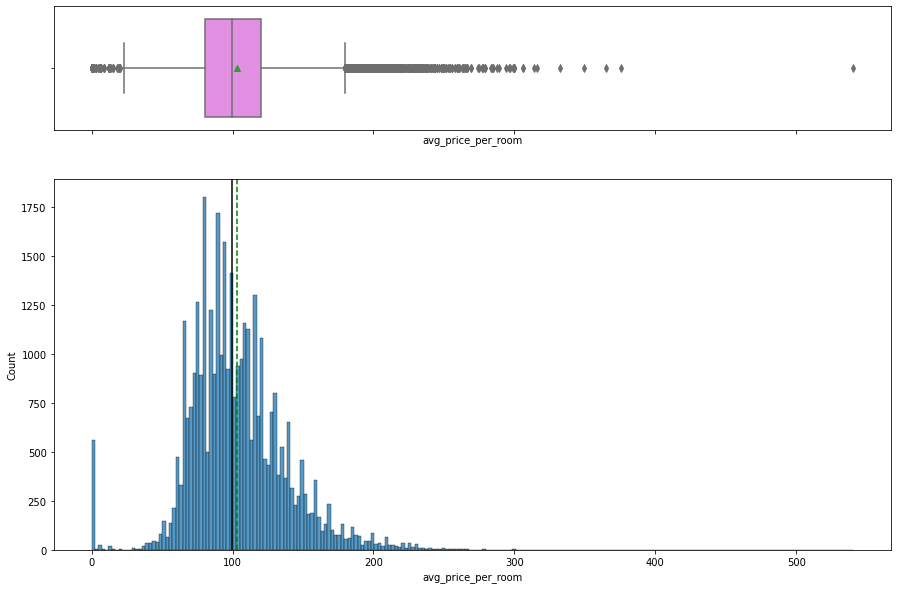

In [ ]:
histogram_boxplot(data, 'avg_price_per_room')

Observations: There is a lot of rooms that cost 0, but since there is so many I do not think it's wrong. Hotels do many promotions or allow reward points to allow it. Furthermore, there is one outlier of 540, which looking at the rest of the data does not seem right. Other than that, hotel prices fluxuate depending on events or holidays and everything else looks good.

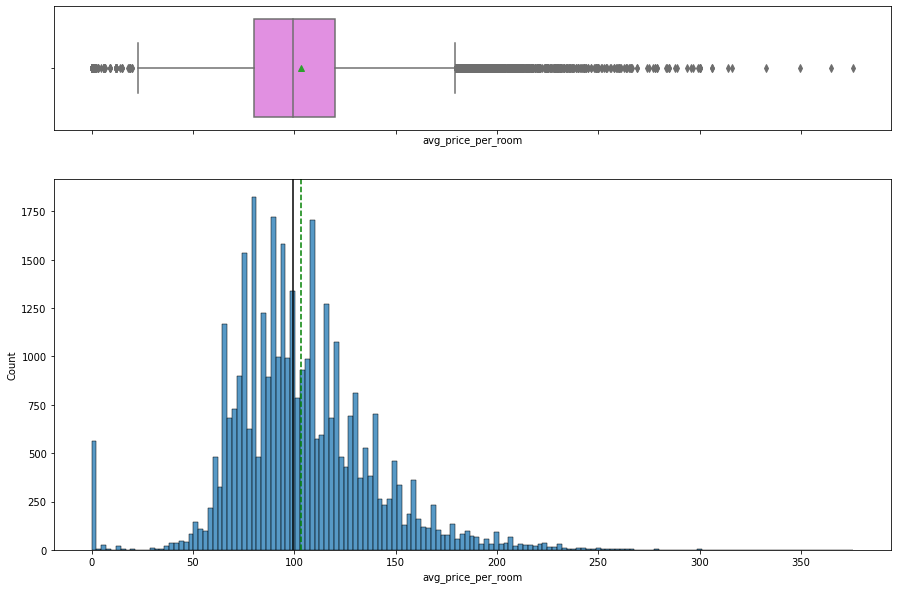

In [ ]:
# Lets replace the super high outliers with the upper whisker. In order to get the upper whisker we need the IQR and the third quartile.
lower_quartile = data['avg_price_per_room'].quantile(0.25)
upper_quartile = data['avg_price_per_room'].quantile(0.75)

# Calculating the IQR and the upper whisker, approximately 179
IQR = upper_quartile - lower_quartile
upper_whisker = upper_quartile + 1.5 * IQR

# Replacing the outlier above 450 into the upper whisker.
data.loc[data['avg_price_per_room'] >= 450, 'avg_price_per_room'] = upper_whisker

# Reprinting the new graph with no outliers.
histogram_boxplot(data, 'avg_price_per_room')

## Bivariate Analysis

### Heatmap

<function matplotlib.pyplot.show>

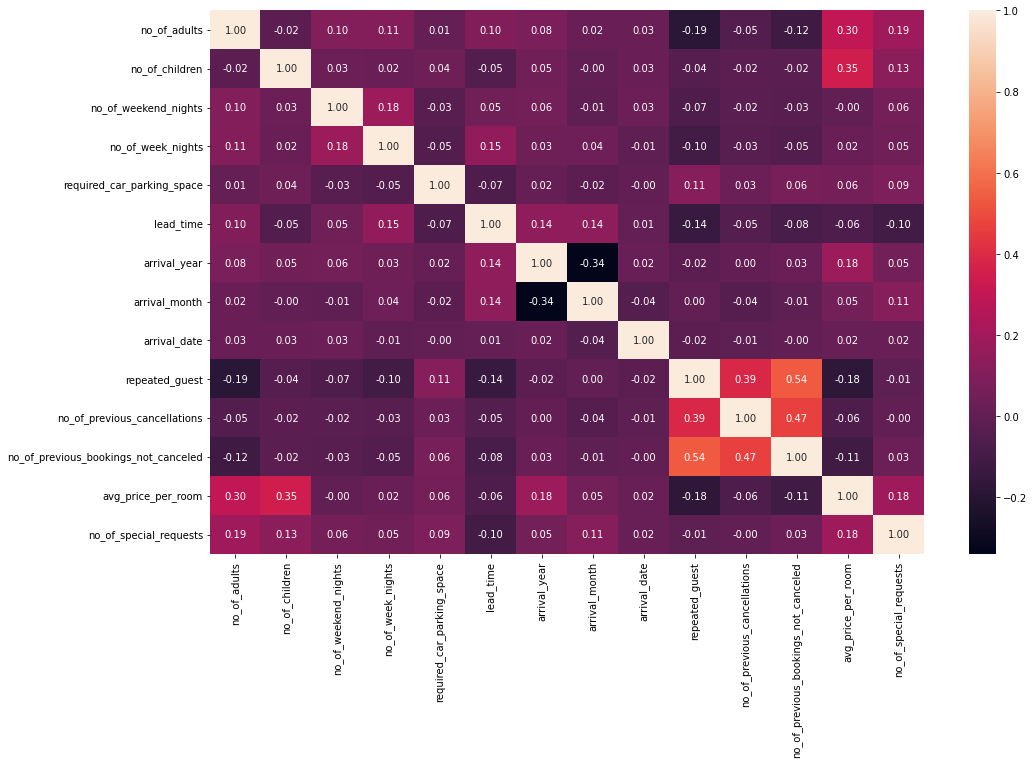

In [ ]:
# Lets start off bivariate analysis with a correlation heatmap of all of our columns.

# Start by creating a list of all column names
column_list = data.select_dtypes(include = np.number).columns.tolist()

# Then create a heatmap
plt.figure(figsize = (16,10))
sns.heatmap(data[column_list].corr(), annot = True, fmt = '.2f')
plt.show

Observations: There are a few correlations between variables. The most positive correlation is between repeated_guest and no_of_previous_bookings_not_canceled. This means the likelihood of a repeated guest not canceling is high. Furthermore, repeated guest and no_of_previous_cancellations are related. Next, the no_of_adults and no_of_children are positively related to avg_price_per_room. The most negative relation is arrival_year and arrival_month which I do not think really has a relation.

### Exploring: avg_price_per_room vs. market_segement_type (Question 3)

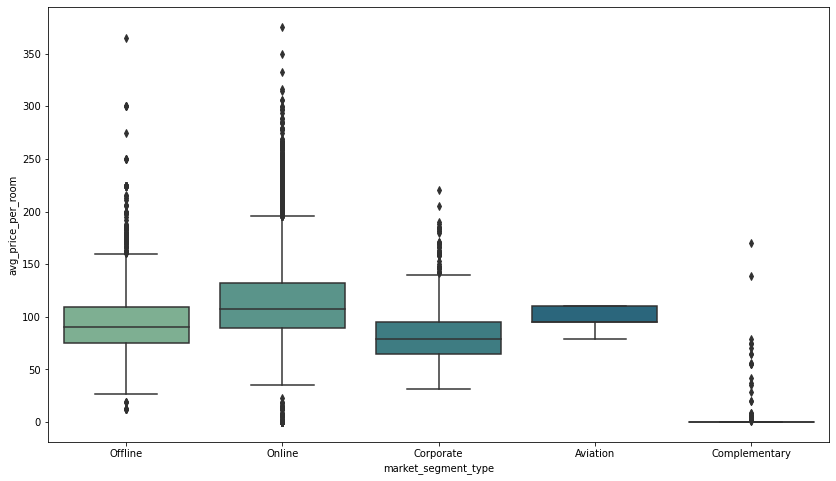

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='market_segment_type', y='avg_price_per_room', palette='crest')
plt.show()

Observations: It looks like the market type does in far matter when it comes to average price. Online and aviation booking's price mean being the highest with complementary being the lowest. 

### Exploring: repeating_guest vs. booking_status (Question 5)

repeated_guest      0    1    All
booking_status                   
All             35345  930  36275
Not_Canceled    23476  914  24390
Canceled        11869   16  11885
------------------------------------------------------------------------------------------------------------------------


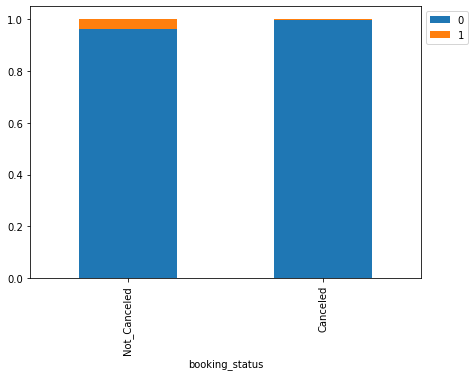

In [ ]:
stacked_barplot(data, 'booking_status', 'repeated_guest')

Observations: Comparing whether or not repeating guests canceled or not.
We can see that the repeating guest, in orange, do not cancel more than they do cancel. Out of 930 of the repeating guest, 914 of them did not cancel that is around 98%.

### Exploring: no_of_special_request vs. booking_status (Question 6)

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


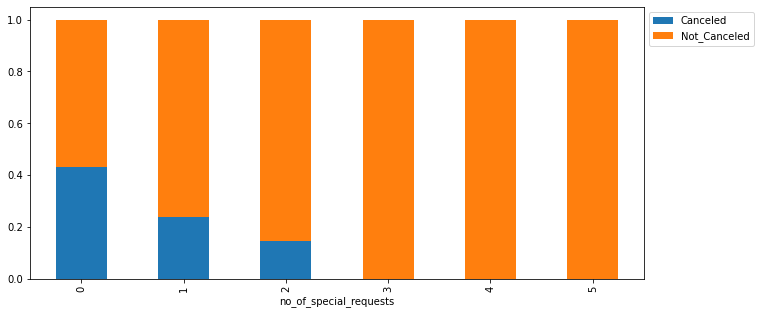

In [ ]:
stacked_barplot(data, 'no_of_special_requests','booking_status')

Observations: As the number of requests increase the less cancellations occur, but this could also be beause the number of total also decreses drastically. Overall, its a good insight to have.

### Exploring: no_of_special_request vs. avg_price_per_room

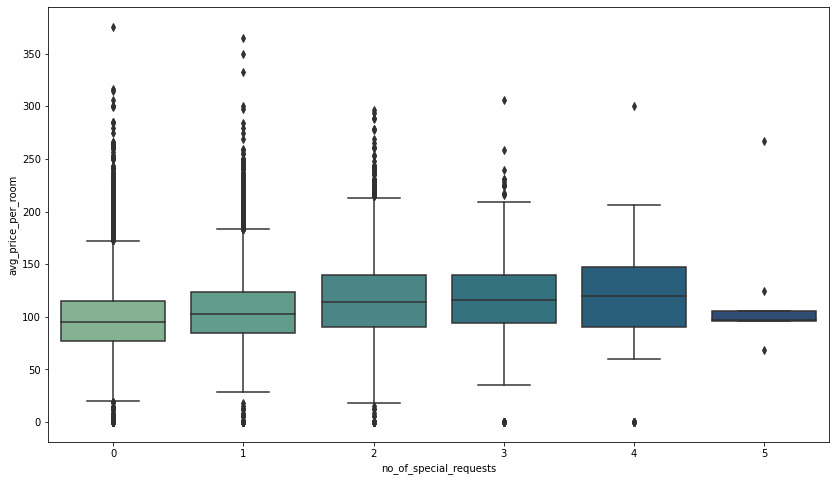

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='no_of_special_requests', y='avg_price_per_room', palette='crest')
plt.show()

Observations: The box plot shows that as the number of requests increases the price also increases except for 5 requests, but that could be due to low sample size. Furthermore, we do not know if these two are related or if there is an underlying causes, such as if you have more people it might be because there are most people in the room which might be the cause.

### Exploring: avg_price_per_room vs. booking_status

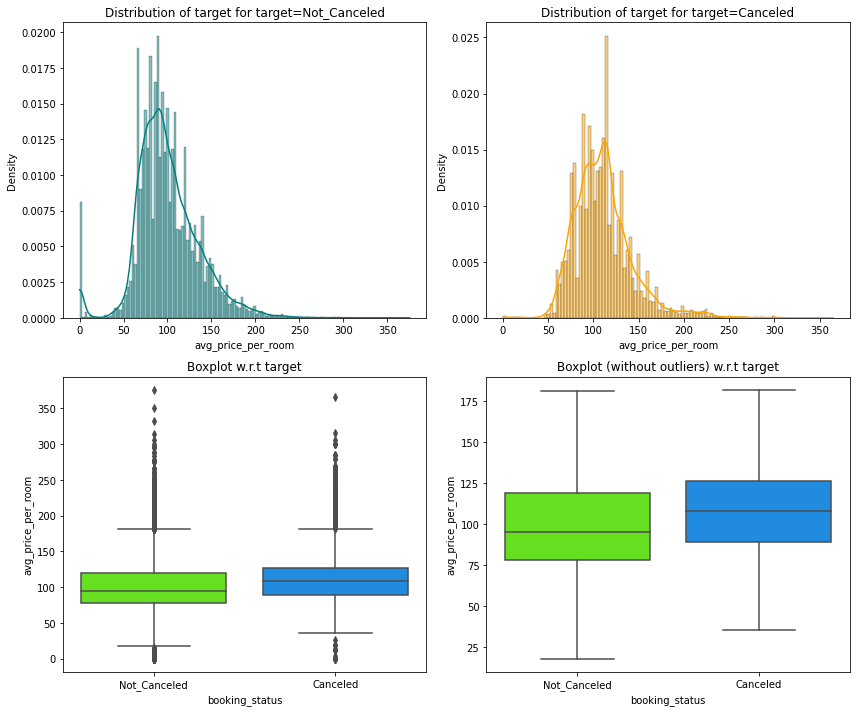

In [ ]:
# We saw in the heatmap these two variables had a positive correlation so lets explore that.
distribution_plot_wrt_target(data, 'avg_price_per_room', 'booking_status')

Observations: We can see from the box plots that the canceled price plot is slightly higher than the not canceled and can see the relationship between the two. One small thing to note is that most complementary bookings average prices are 0 and not many were canceled bringing down the average, but still important information.

### Exploring: lead_time vs. booking_status

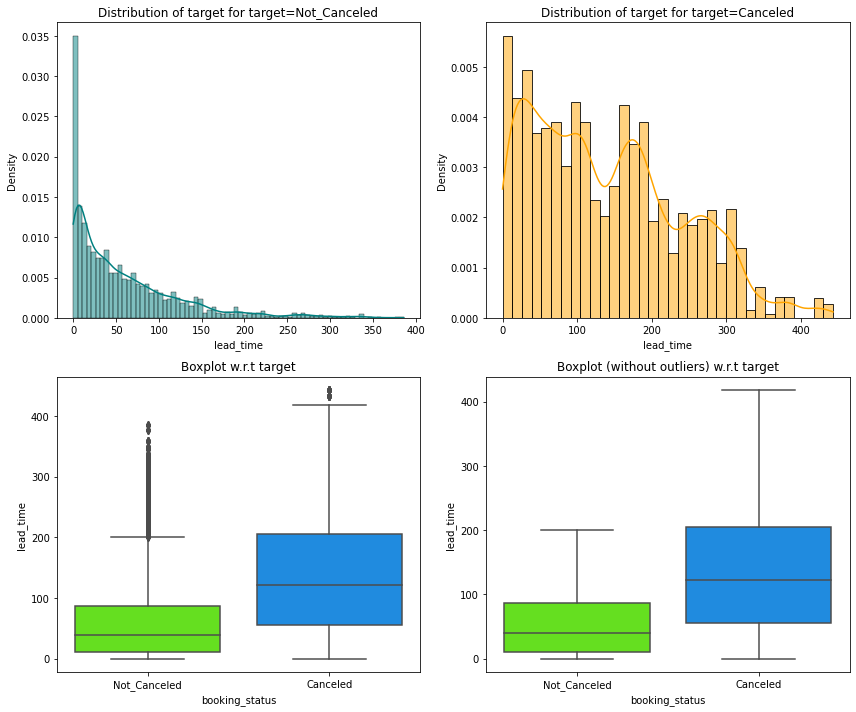

In [ ]:
distribution_plot_wrt_target(data, 'lead_time', 'booking_status')

Observations: Just like I thought when looking at the original sample, canceled bookings tend to have larger lead times. This is an important graph because the difference between the two is the largest yet.

### Exploring: no_of_adults and no_of_children vs. booking_status

booking_status  Canceled  Not_Canceled    All
no_of_adults                                 
All                11885         24390  36275
2                   9119         16989  26108
1                   1856          5839   7695
3                    863          1454   2317
0                     44            95    139
4                      3            13     16
------------------------------------------------------------------------------------------------------------------------


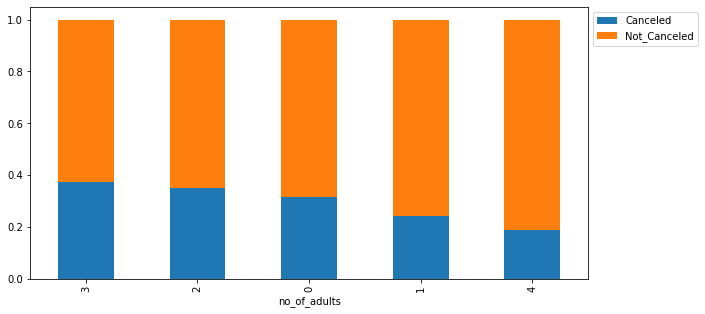

In [ ]:
stacked_barplot(data, 'no_of_adults', 'booking_status')

booking_status  Canceled  Not_Canceled    All
no_of_children                               
All                11885         24390  36275
0                  10882         22695  33577
1                    540          1078   1618
2                    457           601   1058
3                      6            16     22
------------------------------------------------------------------------------------------------------------------------


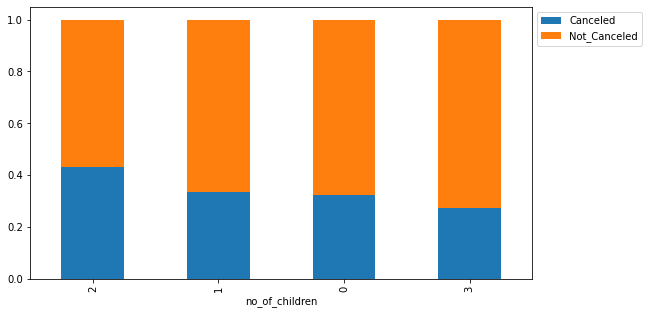

In [ ]:
stacked_barplot(data, 'no_of_children', 'booking_status')

booking_status        Canceled  Not_Canceled    All
no_of_family_members                               
All                      11885         24390  36275
2                         8280         15662  23942
1                         1809          5743   7552
3                         1392          2459   3851
4                          398           515    913
5                            6            11     17
------------------------------------------------------------------------------------------------------------------------


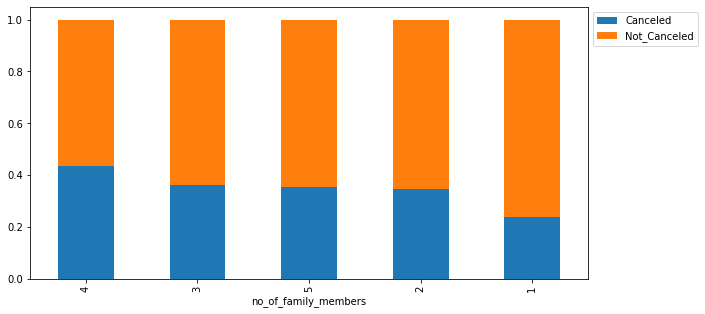

In [ ]:
# Lets try combining these two graphs in order to show entire family booking rates instead of childen vs adults

# First we will make a new dataframe so we do not interfere with the original then combine the no_of_children and no_of_adults
family_data = data[(data['no_of_children'] >= 0) & (data['no_of_adults'] >= 0)]
family_data['no_of_family_members'] = (family_data["no_of_adults"] + family_data["no_of_children"])

# Then print out our new barplot
stacked_barplot(family_data, 'no_of_family_members', 'booking_status')

Observations: The family number with the least cancelations is 1 which makes the most sense. The lower number of people the less problems to run into which could cause a cancellation.

### Exploring: arrival_month vs. booking_status

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
------------------------------------------------------------------------------------------------------------------------


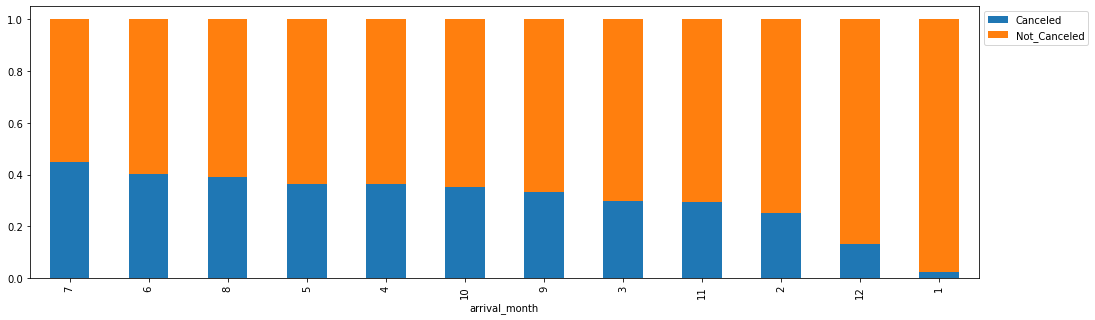

In [ ]:
stacked_barplot(data,'arrival_month','booking_status')

Observations: The most canceled month is July and there does not seem to be any particular reason that I can come up with, but also could be useful to know later down the line. January is the least canceled month and I think this might be due to January also being the month with the least amount of bookings.

### Exploring: arrival_month vs. avg_price_per_room

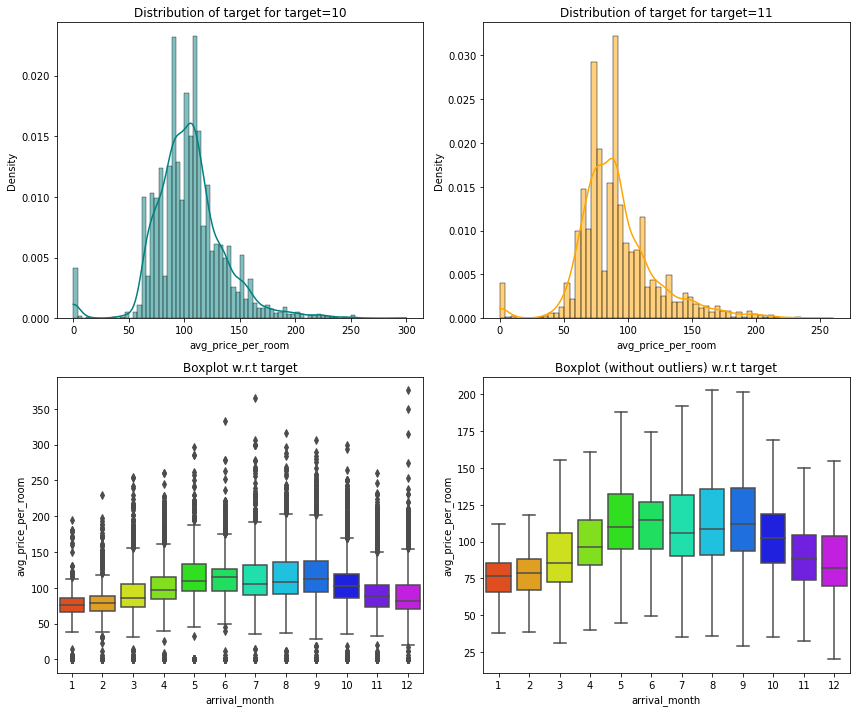

In [ ]:
distribution_plot_wrt_target(data, 'avg_price_per_room', 'arrival_month')

Observations: We can see that the prices follow a trend that increase during the summer time and decrease during the winter. This makes a lot of sense because a lot of people travel during the sumemr, so hotels raise the price to compensate.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [ ]:
# Use this to find missing values in each column
data.isnull().sum()
# We have no missing values

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

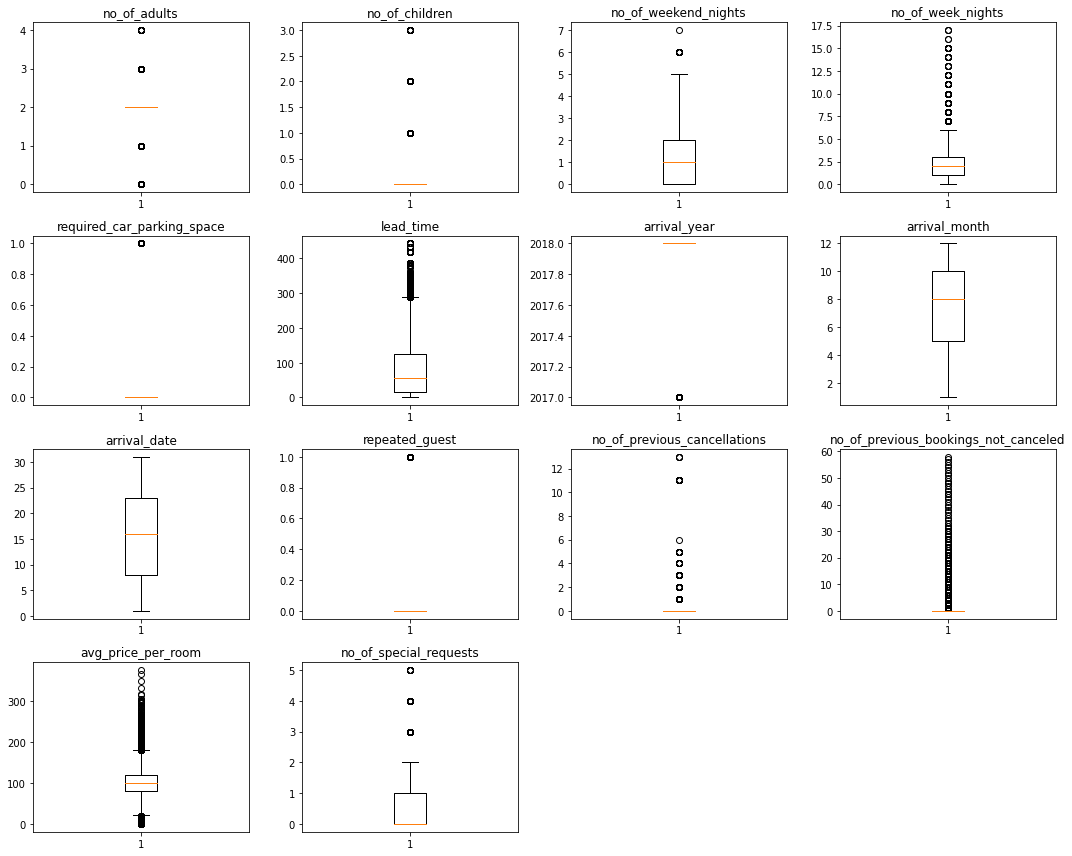

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping booking_status
#numeric_columns.remove('booking_status')

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations: There are not any outliers that we need to focus on and we fixed a few outliers earilier in the project. We also have no misisng values so that is good too and no further action required. Since we fixed outliers during our first EDA there is no reason to explore those again.

## Data Preparation

In [ ]:
# We need to get rid of all categorical variables, so we are going to change booking_status into 1 into Cancelled and 0 into Not Cancelled
data["booking_status"] = data["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

In [ ]:
# specifying the independent and dependent variables
X = data.drop(['booking_status'], axis=1)
Y = data['booking_status']

# adding a constant to the independent variables
X = sm.add_constant(X)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
# Print it out and make sure everything looks right
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Number of rows in train data = 25392
Number of rows in test data = 10883
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


## Building a Logistic Regression model

In [ ]:
# We will need this function for checking the training preformance
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model

def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
# Creating a logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Fri, 17 Jun 2022   Pseudo R-squ.:                  0.3292
Time:                        19:01:00   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -922.8266    120.832     -7.637      0.000   -1159.653    -686.000
no_of_adults                             0.1137      

Observations: We have negative and positive coefficients that determine whether or not the probabilty goes up or down, respectively. Furthermore, there are some significant p-values and some with greater than 0.05 which we will have to deal with along with the multicollinearity

In [ ]:
# It is important to check the performance before so you have something to compare to down the line
print('Training preformance')
model_performance_classification_statsmodels(lg, X_train, y_train)

Training preformance


,Accuracy,Recall,Precision,F1
0,0.80600,0.63410,0.73971,0.68285


## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [ ]:
# This function will help us check the VIF used for 
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(X_train)

,feature,VIF
0,const,39497686.20788
1,no_of_adults,1.35113
2,no_of_children,2.09358
3,no_of_weekend_nights,1.06948
4,no_of_week_nights,1.09571
5,required_car_parking_space,1.03997
6,lead_time,1.39517
7,arrival_year,1.43190
8,arrival_month,1.27633
9,arrival_date,1.00679


Observations: The general rule of thumb when it comes to VIF is if the value is above 5 then there is some multicollinearity present. It only worsens as the value gets higher. There is no need to check dummy variable which is why we do not need to test anything, but we will remove those with high p-values.

### Removing high p-values

In [ ]:
# Lets remove some of the high p-value variables so we can get more accurate results
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [ ]:
# Lets create new training and testing variables with the new selected features then test them
X_train1 = X_train[selected_features]
X_test1 = X_test[selected_features]

In [ ]:
# Test and print out a new summary
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp = False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Fri, 17 Jun 2022   Pseudo R-squ.:                  0.3282
Time:                        19:01:03   Log-Likelihood:                -10810.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -915.6391    120.471     -7.600      0.000   -1151.758    -679.520
no_of_adults                       0.1088      0.037      2.914      0.

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80545,0.63267,0.73907,0.68174


Observations: After dropping the high p-value varibales and then checking the training performance again, we can see that it was not altered too much meaning we got rid of multicollinearity without affecting our results and consider this to be our final model.

### Converting Coefficents to Odds

In [ ]:
# Before we check the proformance of our final model, lets convert our coefficients to odds.
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.00000,1.11491,1.16546,1.11470,1.04258,0.20296,1.01583,1.57195,0.95839,0.06478,1.25712,1.01937,0.22996,1.17846,1.33109,0.70104,0.75364,0.47885,0.37977,0.23827,0.45326,0.16773
Change_odd%,-100.00000,11.49096,16.54593,11.46966,4.25841,-79.70395,1.58331,57.19508,-4.16120,-93.52180,25.71181,1.93684,-77.00374,17.84641,33.10947,-29.89588,-24.63551,-52.11548,-62.02290,-76.17294,-54.67373,-83.22724


Observations: So by converting our coeffiecients to odds we can see many relationships in the data. Some of them include (if we hold the other features constant), if a booking requires a parking space then it will decrease that chance of cancellation by 79.7%, or if you increase the number of children by one there is an 16.5% increase chance of cancellation. A lot of these relationship could be seen in EDA such as lead_time heavily affecting cancellation.

## Model performance evaluation

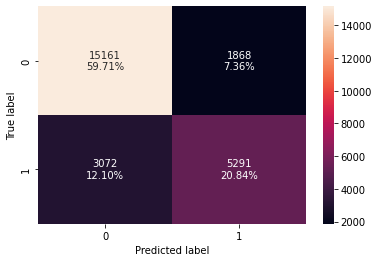

In [ ]:
# We can create a confusion matrix to check the proformance of the new model
confusion_matrix_statsmodels(lg1, X_train1, y_train)

Observations: Since this is the first confusion matrix I will explain it and give insight. 

*   The top left, (0,0), is the True Postive meaning that the booking was predicted not canceled and was actually not canceled.
*   The bottom right, (1,1), is the True Negative meaning it was predicted canceled and was actually canceled. 
*   The top right, (1,0), is a false positive meaning it was predicted to be canceled, but it was not canceled
*   The bottom left, (0,1), is a false negative meaning it as predicted to be not canceled, but it was canceled

The goal is to lower the amount of false negatives and false positives because they are ultimately cost the company more than if the prediction was 100% accurate, but that is not realistic.

In [ ]:
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(lg1, X_train1, y_train)
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80545,0.63267,0.73907,0.68174


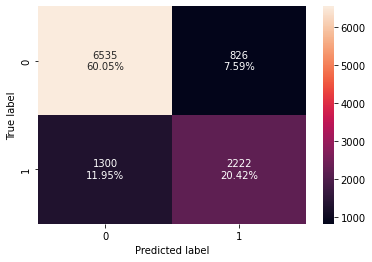

In [ ]:
confusion_matrix_statsmodels(lg1, X_test1, y_test)

In [ ]:
print("Test performance:")
log_reg_model_test_perf = model_performance_classification_statsmodels(lg1, X_test1, y_test)
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80465,0.63089,0.72900,0.67641


Observations: THe model is very consistent between the training and test scores, which means that model is not overfitting. Lets continue on and try to improve the performance of the model.

### Model Improvement
*  Lets start to improve the scores by changing the threshold we can do this by using AUC-ROC curve and then a Precision-Recall curve.

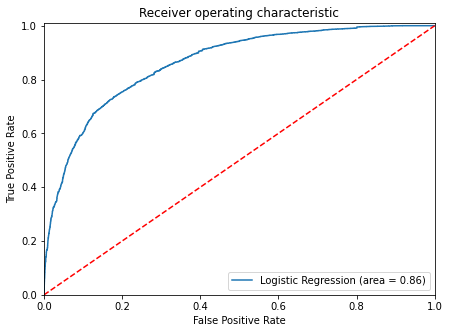

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Lets see if we can improve the AUC-ROC curve by utilizing a threshold.
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3700522558707859


Observations: According to AUC-ROC curve our optimal threshold is approximently 0.37 and the graph looks good on the training set, so lets now apply the new threshold to our confusion matrix and scores.

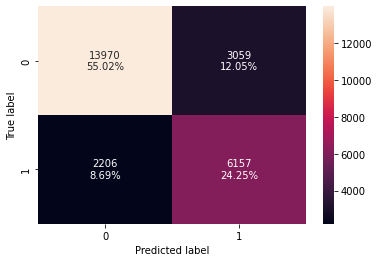

In [ ]:
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc)

In [ ]:
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_auc_roc)

# Print it out
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79265,0.73622,0.66808,0.70049


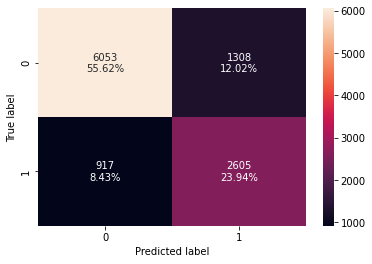

In [ ]:
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)

In [ ]:
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_auc_roc)

# Print it out
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.79555,0.73964,0.66573,0.70074


Observations: The threshold changed our confustion matrix and performance quite a bit, so lets see if we can use Precision-Recall curve to find a better threshold.

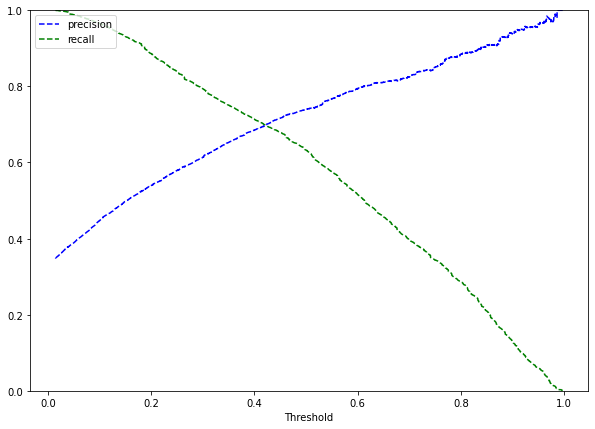

In [ ]:
# Lets create our Precision-Recall curve
y_scores = lg1.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

# This function is to help us find the precision-recall curve
def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [ ]:
# Lets set our new threshold and test the data again. By the graph we can see our new threshold should be approximately 0.42
optimal_threshold_curve = 0.42

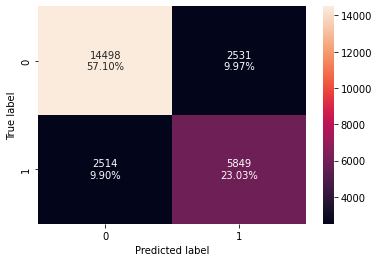

In [ ]:
confusion_matrix_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(lg1, X_train1, y_train, threshold=optimal_threshold_curve)


print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80132,0.69939,0.69797,0.69868


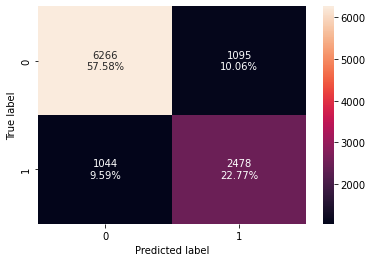

In [ ]:
confusion_matrix_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(lg1, X_test1, y_test, threshold=optimal_threshold_curve)


print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80345,0.70358,0.69353,0.69852


Observations: Looks like the opitimal threshold works better than the auc-roc threshold by looking at the performance. Recall improve a lot in training.

## Final Model Summary

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80545,0.79265,0.80132
Recall,0.63267,0.73622,0.69939
Precision,0.73907,0.66808,0.69797
F1,0.68174,0.70049,0.69868


In [ ]:
# testing performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.80465,0.79555,0.80345
Recall,0.63089,0.73964,0.70358
Precision,0.72900,0.66573,0.69353
F1,0.67641,0.70074,0.69852


Observations: All models are preforming well on both training and testing. The model with the 0.37 theshold is giving the best F1 score, so I think that will be the best model for reducing false positives and false negatives.

## Building a Decision Tree model

In [ ]:
# There are a couple of functions that we will need in order to help up with the decision tree process
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# And we also need the confusion matrix function for sklearn
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
# Start by spliting the independent and dependent variable
X = data.drop(['booking_status'], axis=1)
Y = data['booking_status']

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [ ]:
model = DecisionTreeClassifier(random_state = 1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

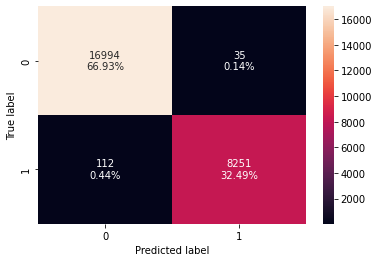

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99421,0.98661,0.99578,0.99117


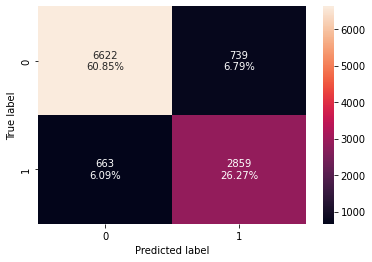

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.87118,0.81175,0.79461,0.80309


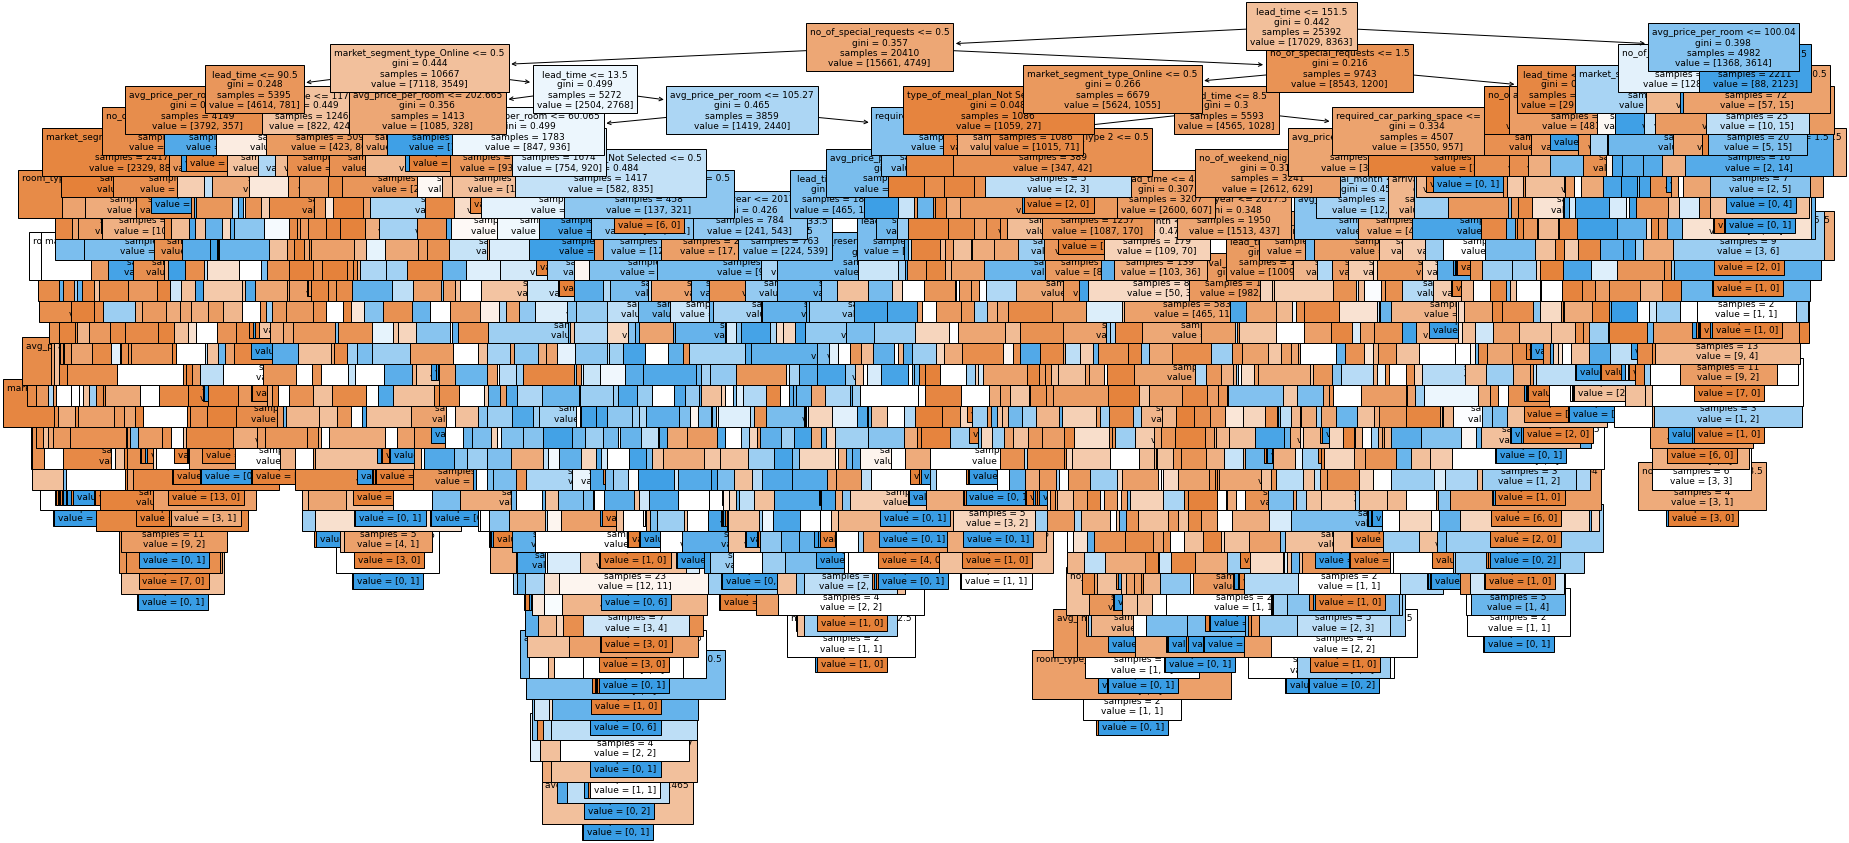

In [ ]:
# We can create a decision tree plot with this.
plt.figure(figsize=(30, 15))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

Observations: There is a disparity between the two, training and test, sets, so lets look into some pruning options. Plus by looking at the current decision tree it is cluttered and illegeible.

## Do we need to prune the tree? Yes!

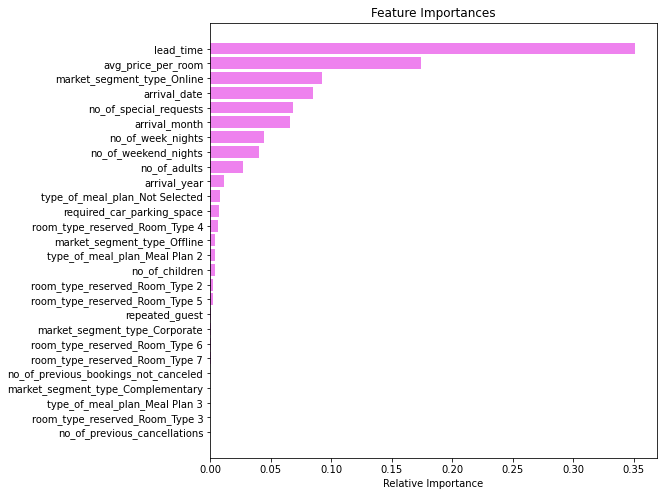

In [ ]:
# Lets start pruning by looking at which variables affect the booking_status the most. 
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observations: After plotting the importance of each variable, we can see that lead_time, avg_price_per_room, and market_segment_Online are the three most influential. This means that lead_time will most likely be the root node with avg_price following down the tree. We can utilize pre-pruning to cut the tree building process early with just the most influential features in our tree.

In [ ]:
# We will start with some Pre-Pruning
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

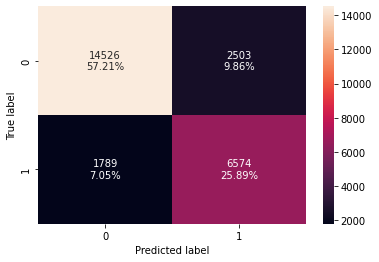

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.83097,0.78608,0.72425,0.75390


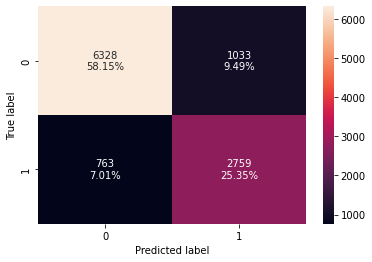

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.83497,0.78336,0.72758,0.75444


Observations: We can see that after pre-pruning the values of accuracy, recall, and precision are all very close. Which means the model is able to generalize well on unseen data. Now lets visualize the decision tree.

###Visualizing the Tree

In [ ]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

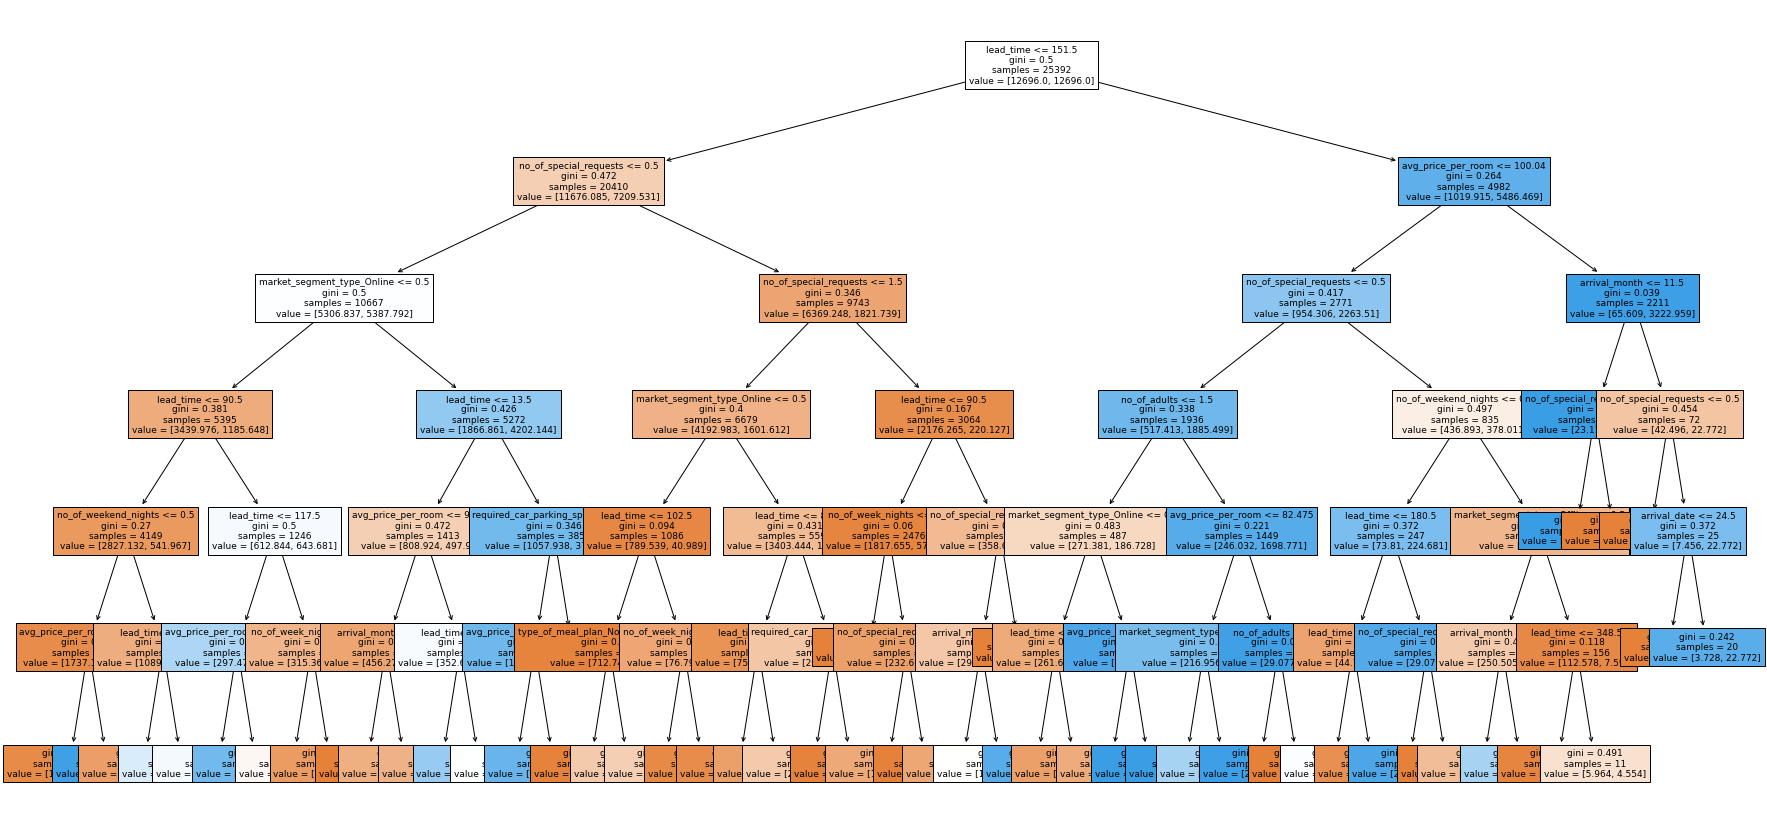

In [ ]:
plt.figure(figsize=(30, 15))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Here it is in text form too!
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 133.59] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 24.29] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

Observations: As you can see this visualization looks much different than the one above it. Much less clutters, but does it give the best results we will find out at the end. And just like I suspected the lead_time was the root node.

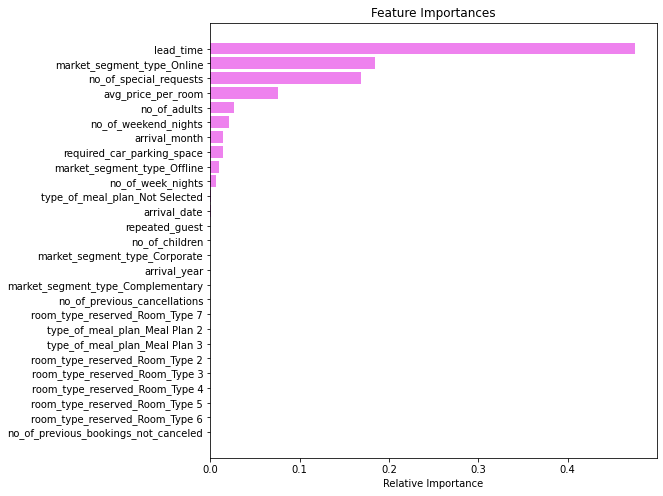

In [ ]:
# importance of features in the tree building
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Cost Complexity Pruning
* Post-pruning provides certain limitations that help prevent overfitting

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities
# We find impurities in order to find the smallest effective alpha which then gets pruned first.

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00838
1,0.00000,0.00838
2,0.00000,0.00838
3,0.00000,0.00838
4,0.00000,0.00838
...,...,...
1839,0.00890,0.32806
1840,0.00980,0.33786
1841,0.01272,0.35058
1842,0.03412,0.41882


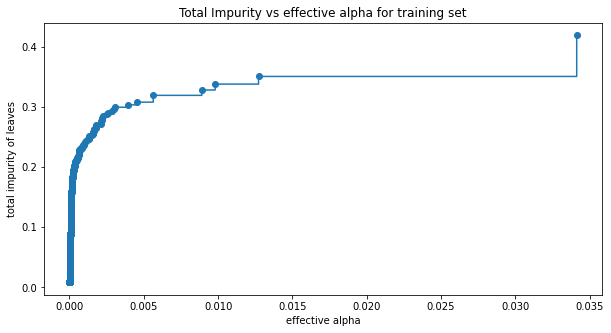

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Observations: We can clearly see in this graph that as alpha increases the total impurity of the leaves also increases.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0811791438913696


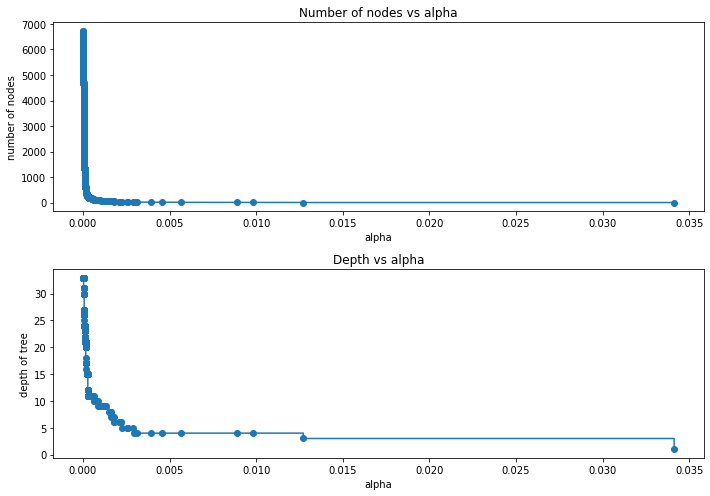

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Observations: We can clearly see that as alpha decreases the number of nodes decrease and the depth of the tree. (and vice versa) 

### F1 Score
* We are going to train to maximize F1 score and recall in order to compare the two to see which one has the better model

In [ ]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

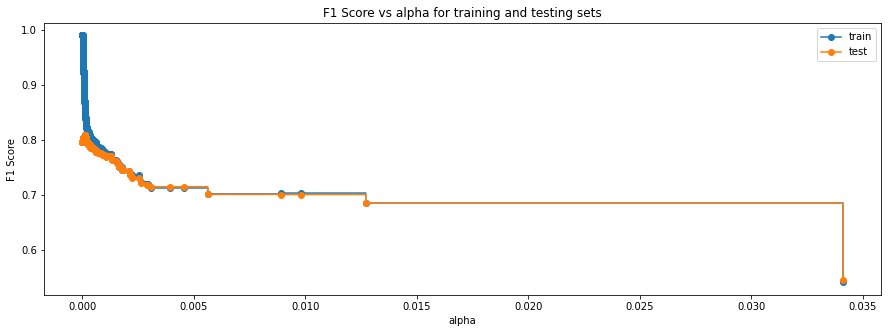

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

### Lets try to create a model where we try to get the highest training and test recall.

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

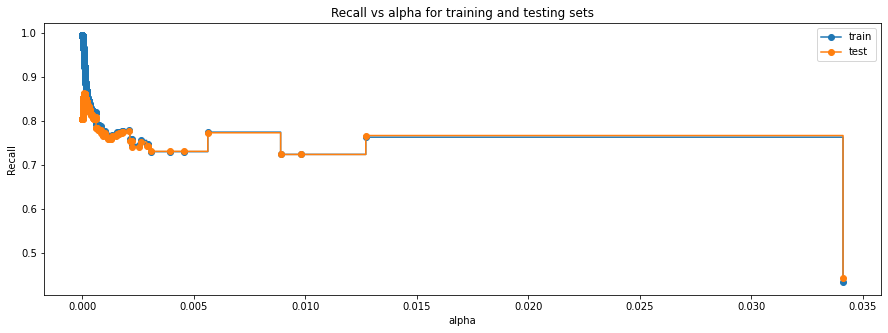

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

### Best Model out of the three?


*   I choose to use F1 score for my best model. Although the recall had higher scores, F1 scores were more consistent between the training and test data. Furthermore, the use of the F1 Score will help reduce false positives and false negatives which is very important in this case.



In [ ]:
# Creating our best model
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167043,
                       class_weight='balanced', random_state=1)


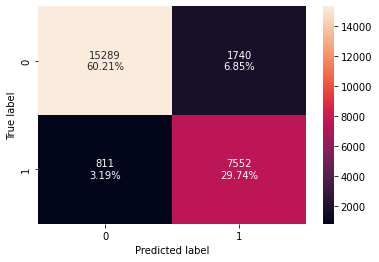

In [ ]:
# Training Confusion matric for the best model
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
# Training Model performance for the best model
decision_tree_post_perf_train = model_performance_classification_sklearn(best_model, X_train, y_train)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.89954,0.90303,0.81274,0.85551


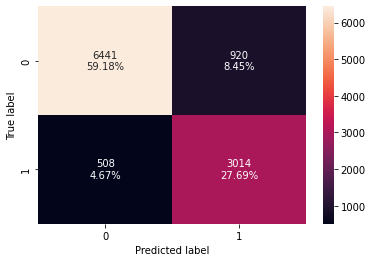

In [ ]:
# Test Confusion matric for the best model
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
# Test Model performance for the best model
decision_tree_post_perf_test = model_performance_classification_sklearn(best_model, X_test, y_test)
decision_tree_post_perf_test

,Accuracy,Recall,Precision,F1
0,0.86879,0.85576,0.76614,0.80848


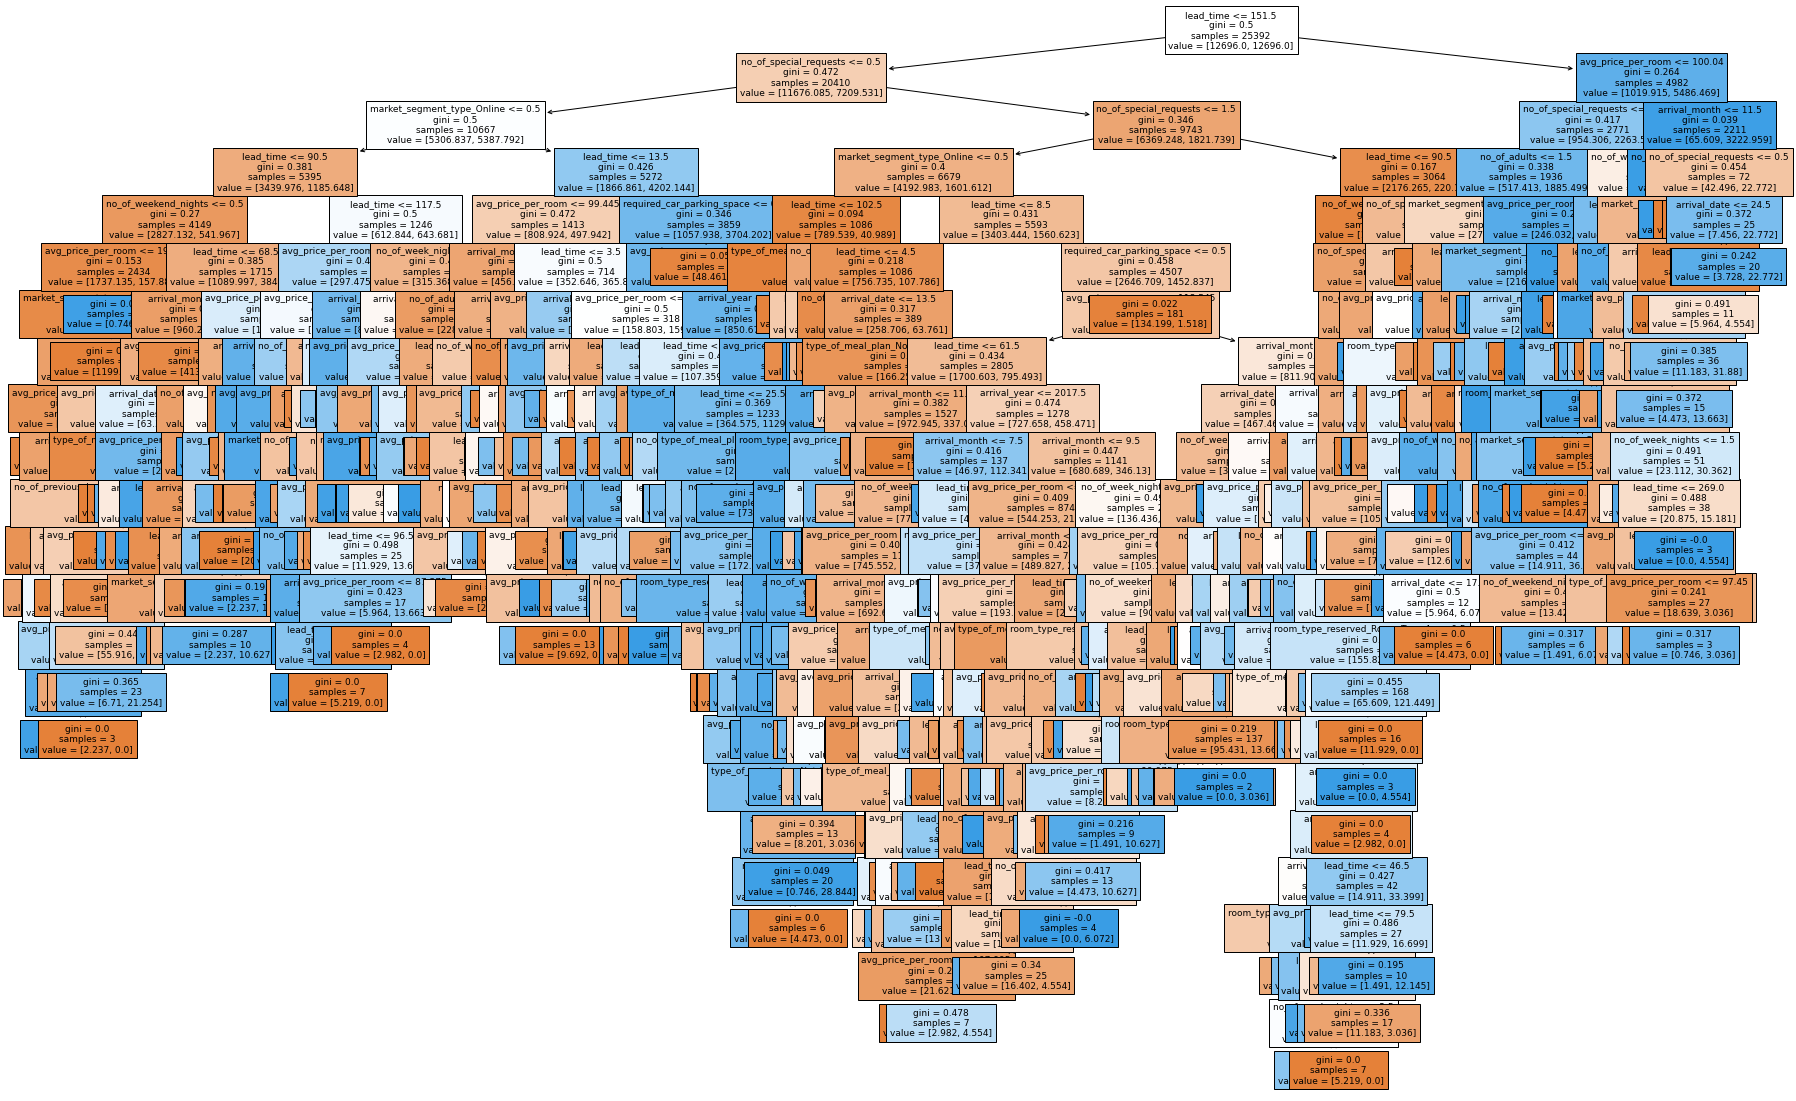

In [ ]:
# The decision tree for the best model
plt.figure(figsize=(30, 20))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Here it is in text form too!
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

## Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison
models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.83097,0.83097,0.89954
Recall,0.78608,0.78608,0.90303
Precision,0.72425,0.72425,0.81274
F1,0.75390,0.75390,0.85551


In [ ]:
# test performance comparison
models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.83497,0.83497,0.86879
Recall,0.78336,0.78336,0.85576
Precision,0.72758,0.72758,0.76614
F1,0.75444,0.75444,0.80848


Observations: All models preformed well. Pre prunings scores are pretty consistent which would make the predictions be consistent, but Post pruning have higher scores leading to less errors and over all cost effective.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
  * The hotel could instate a policy that makes guest have to cancel their booking a certain amount of time before their stay in order to let the hotel have time to resell the room.
  * The hotel could have a cancellation fee so that it would help deter guest canceling or it could reduce the profit margin.
  * The hotel could instate a policy that could regularly reminds guest via online about their upcoming stay. Such that those with longer lead times could realize that they need to cancel before it becomes a loss for the hotel.
- What other recommedations would you suggest to the hotel?
1. The model built can be used to predict if a hotel booking will be canceled or not and can identify 85.6% of canceled bookings.
1. The most important variables when predicting whether or not a booking will be canceled are lead time, average price per room, number of special requests, and the Online market segement. With this information we can make suggestions like:
  *  Since higher lead time leads to more cancelations the hotel could put in a system where they could limit guests making a booking past a certain date. In this case from the decision tree, 151.5 days or 152 days would be the best. They could even do a little higher if fear of losing guests.
  *  Since more special requests lead to less cancellations, by looking at the decision tree, the hotel could advertise that they take special requests. Special requests make the hotel feel more personalized to the guest and could also help them become repeating customers.
  * Price is fickle because if it is too cheap then they are more likely to cancel, but you do not want to raise prices just so people do not cancel else you will be denying yourself business. From the decision tree, the middle ground is around 100 dollars to aim for.
  * Since their most influential market segment is Online, maybe push some more online advertisement, look into making some promotional services if they book online, or revamp their website for more seemless and easy online booking. When it comes to online engage the options are endless.
1. I think that from these insights and recommendations the company should look into utilizing more data for analysis in order to get even more reliable results.